<h1><div class="alert alert-block alert-info">
Time Series - VAR Models
</div></h1>

Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term.

A $p-th$ order VAR, denoted $VAR_p$, is

${\displaystyle y_{t}=c+A_{1}y_{t-1}+A_{2}y_{t-2}+\cdots +A_{p}y_{t-p}+e_{t}}$

where the observation $y_{t−i}$ (i periods back) is called the $i-th$ lag of $y$, $c$ is a k-vector of constants (intercepts), $A_i$ is a time-invariant (k × k)-matrix and et is a k-vector of error terms satisfying

- ${\displaystyle \mathrm {E} (e_{t})=0\,}{\mathrm  {E}}(e_{t})=0\$ — every error term has mean zero;

- ${\displaystyle \mathrm {E} (e_{t}e_{t}')=\Omega \,}$ — the contemporaneous covariance matrix of error terms is Ω (a k × k positive-semidefinite matrix);

- ${\mathrm {E} (e_{t}e_{t-k})=0}$ for any non-zero k — there is no correlation across time; in particular, no serial correlation in individual error terms.

Source: https://en.wikipedia.org/wiki/Vector_autoregression

In [3]:
options(repr.plot.width=15, repr.plot.height=10)

In [4]:
library(vars)
library(fpp)

<h1>Data Analysis</h1>

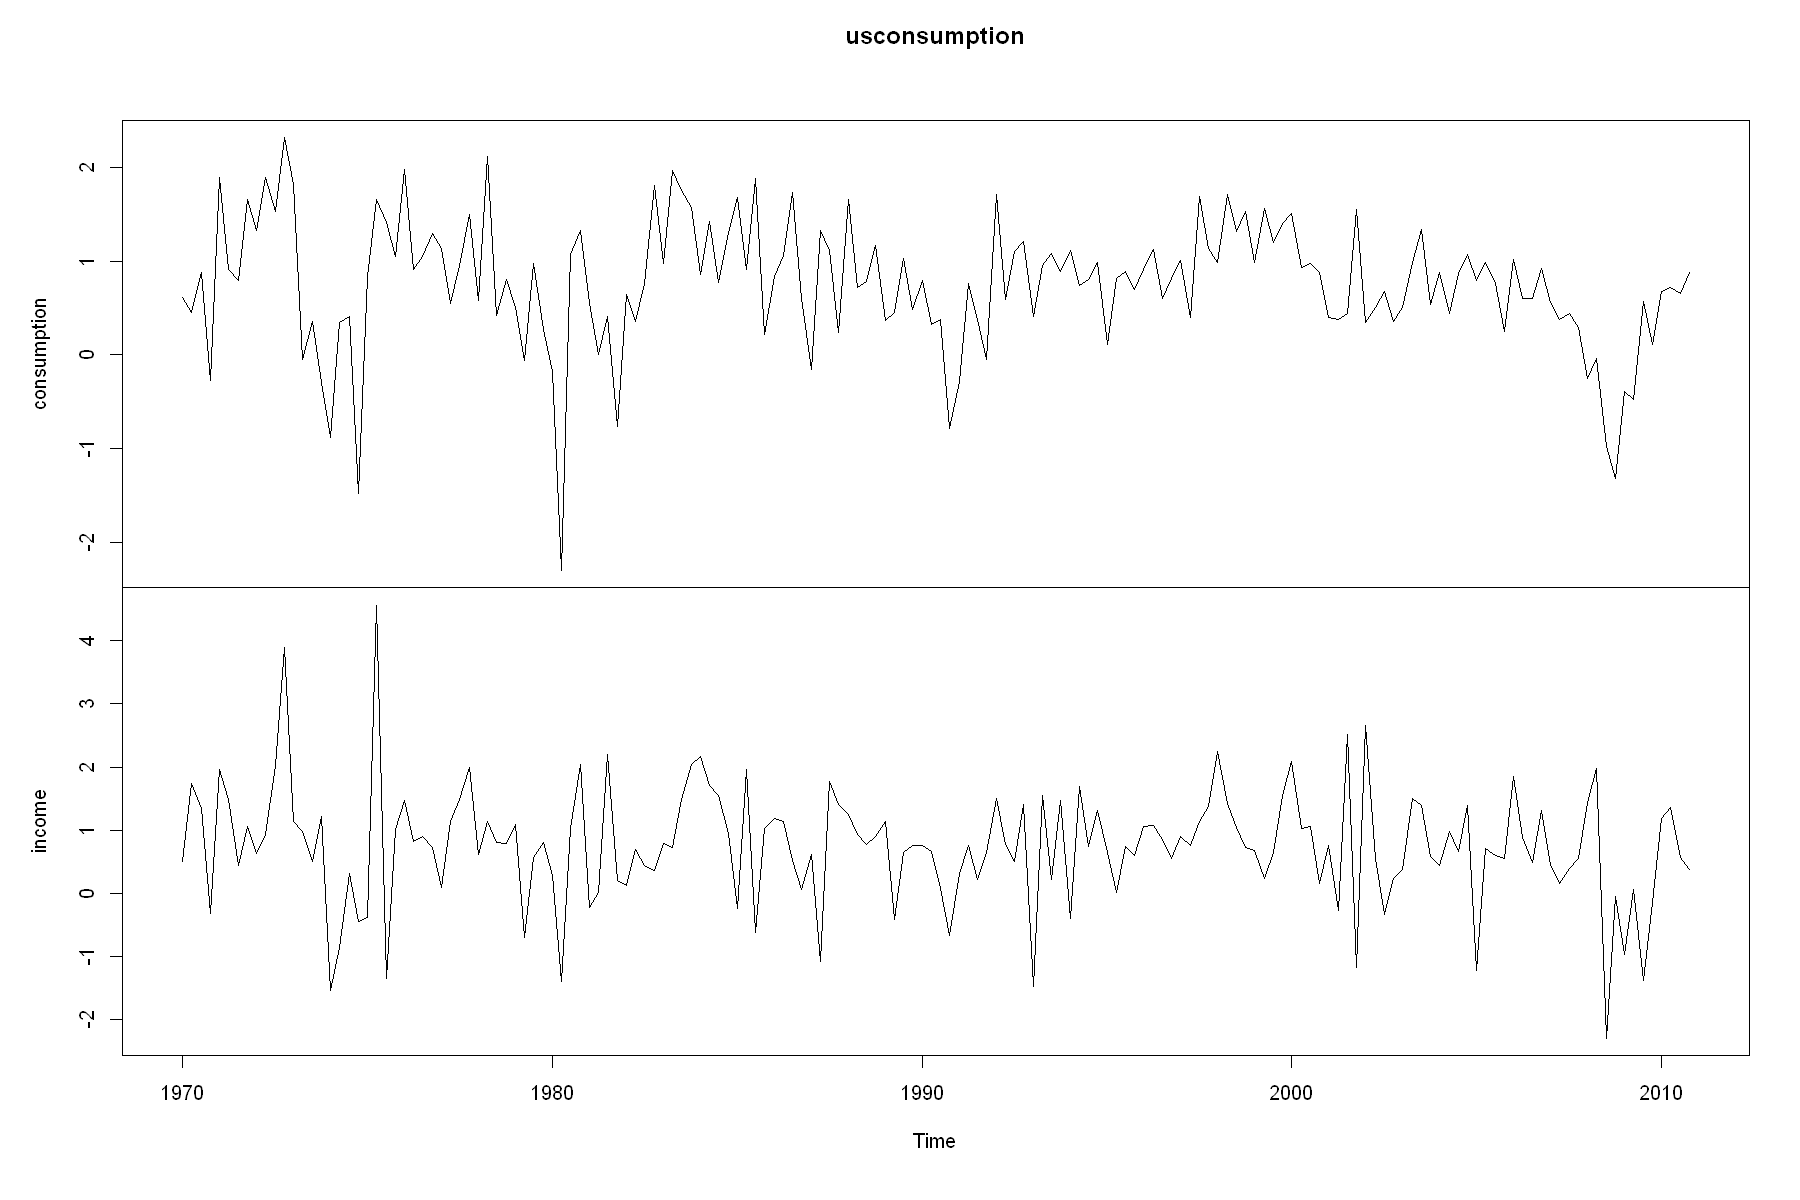

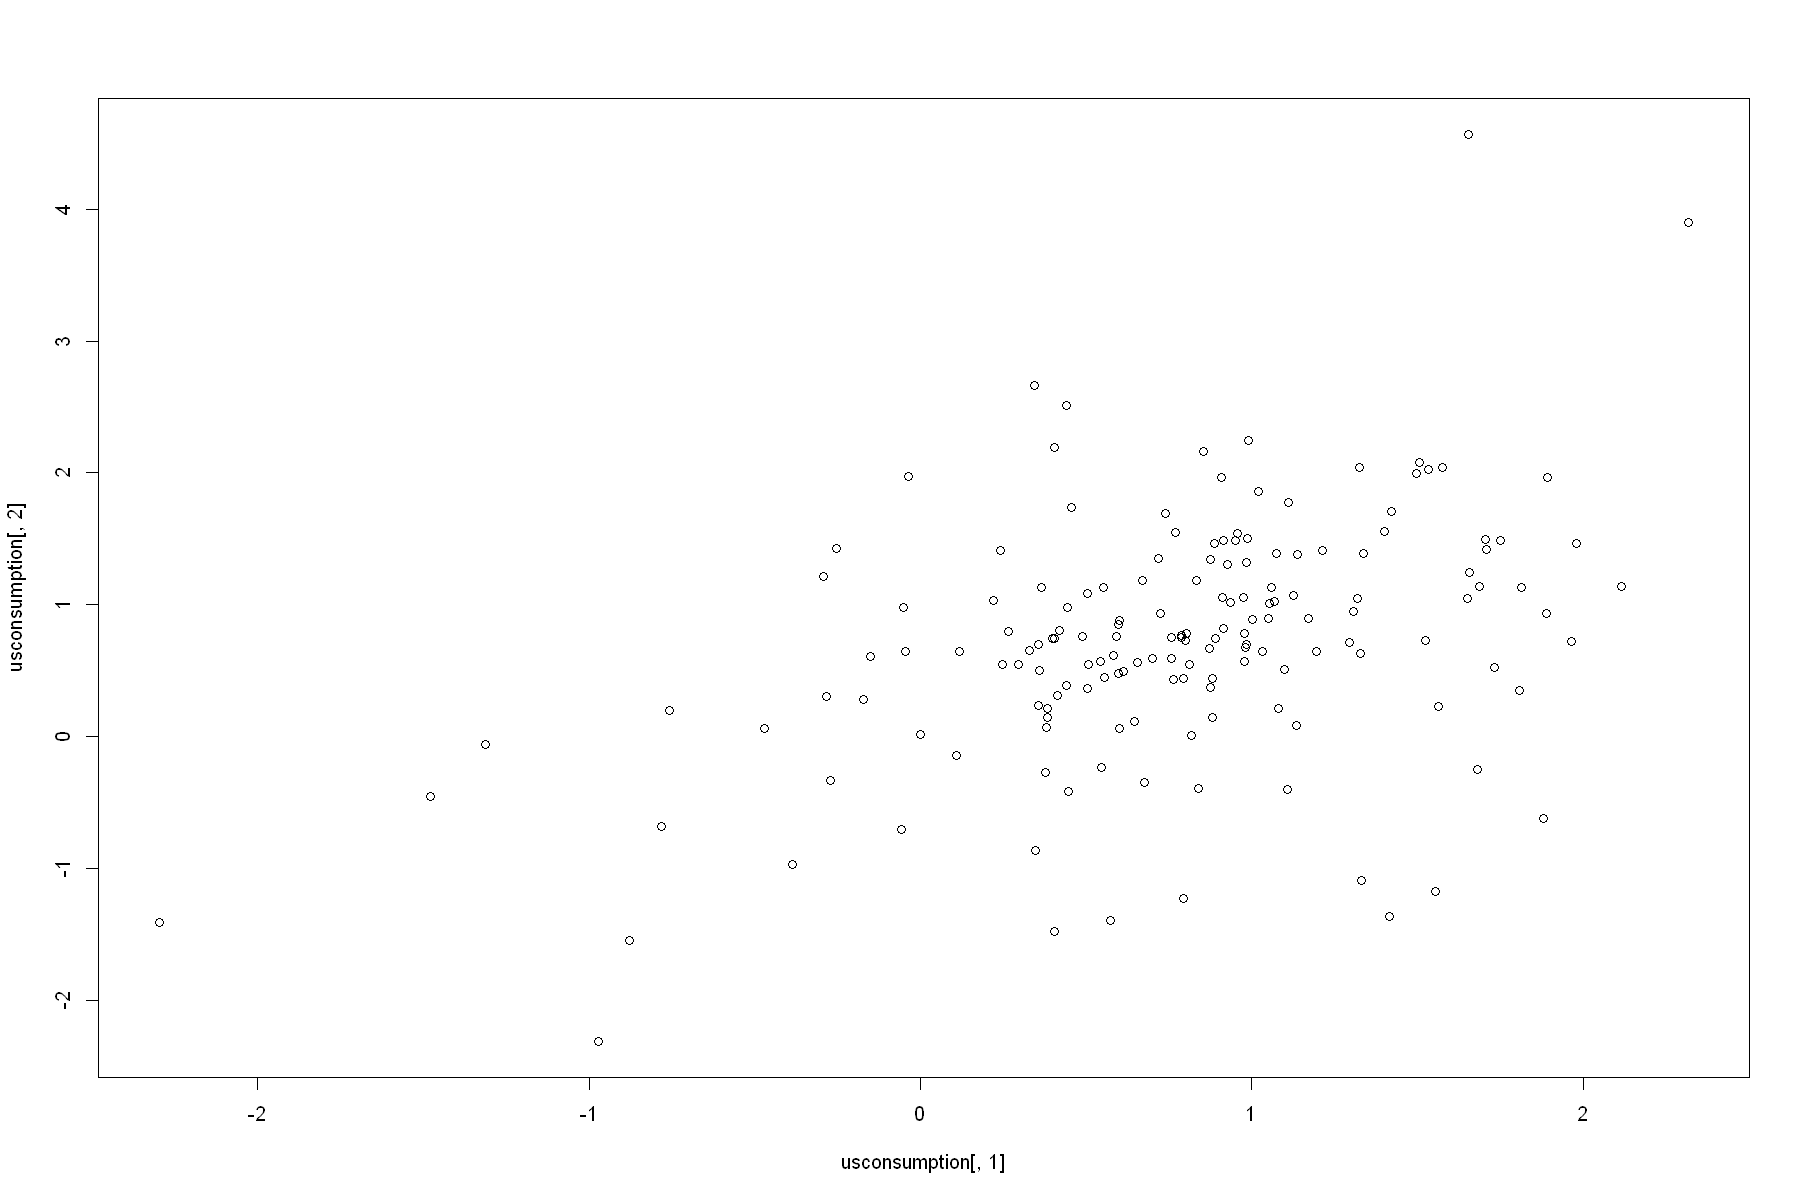

In [66]:
data(usconsumption)
plot(usconsumption)
plot(usconsumption[,1], usconsumption[,2])

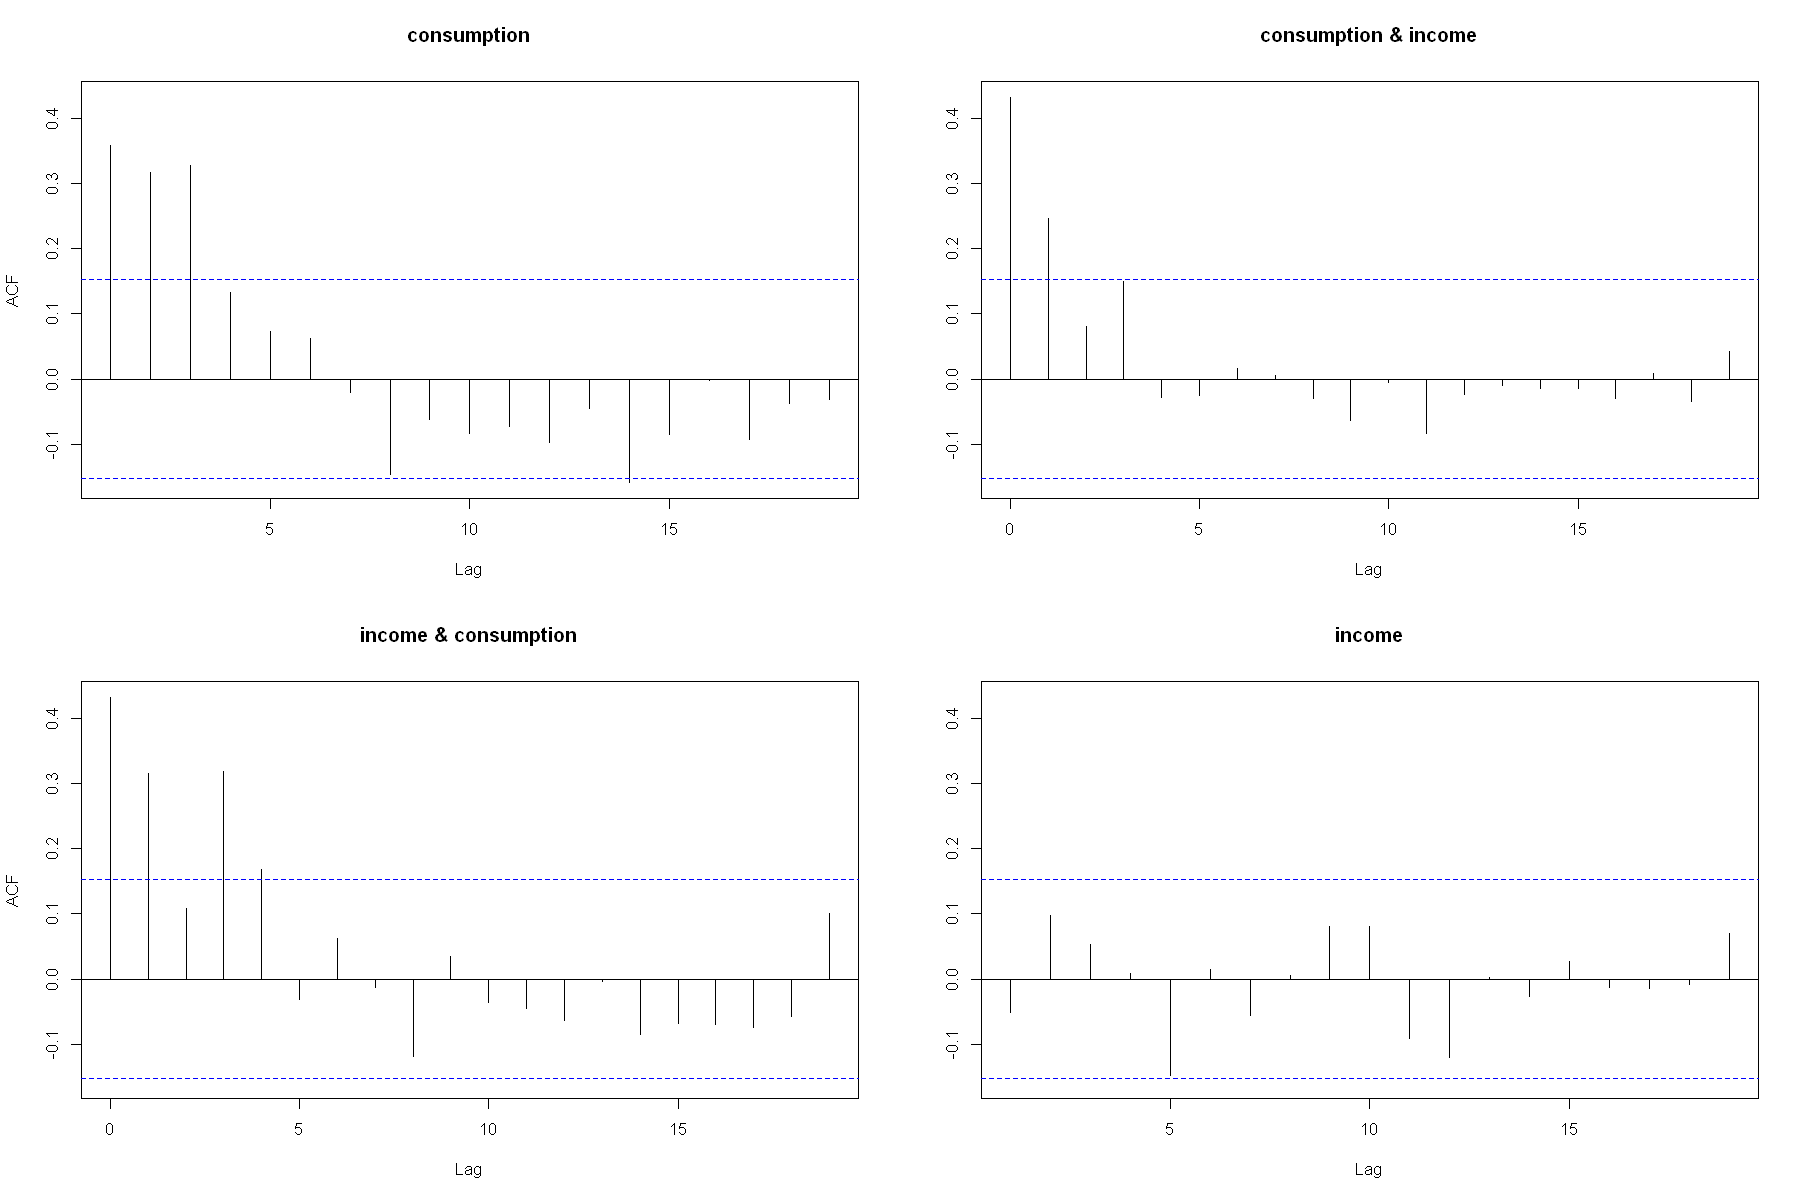

In [9]:
Acf(usconsumption, type='cor')

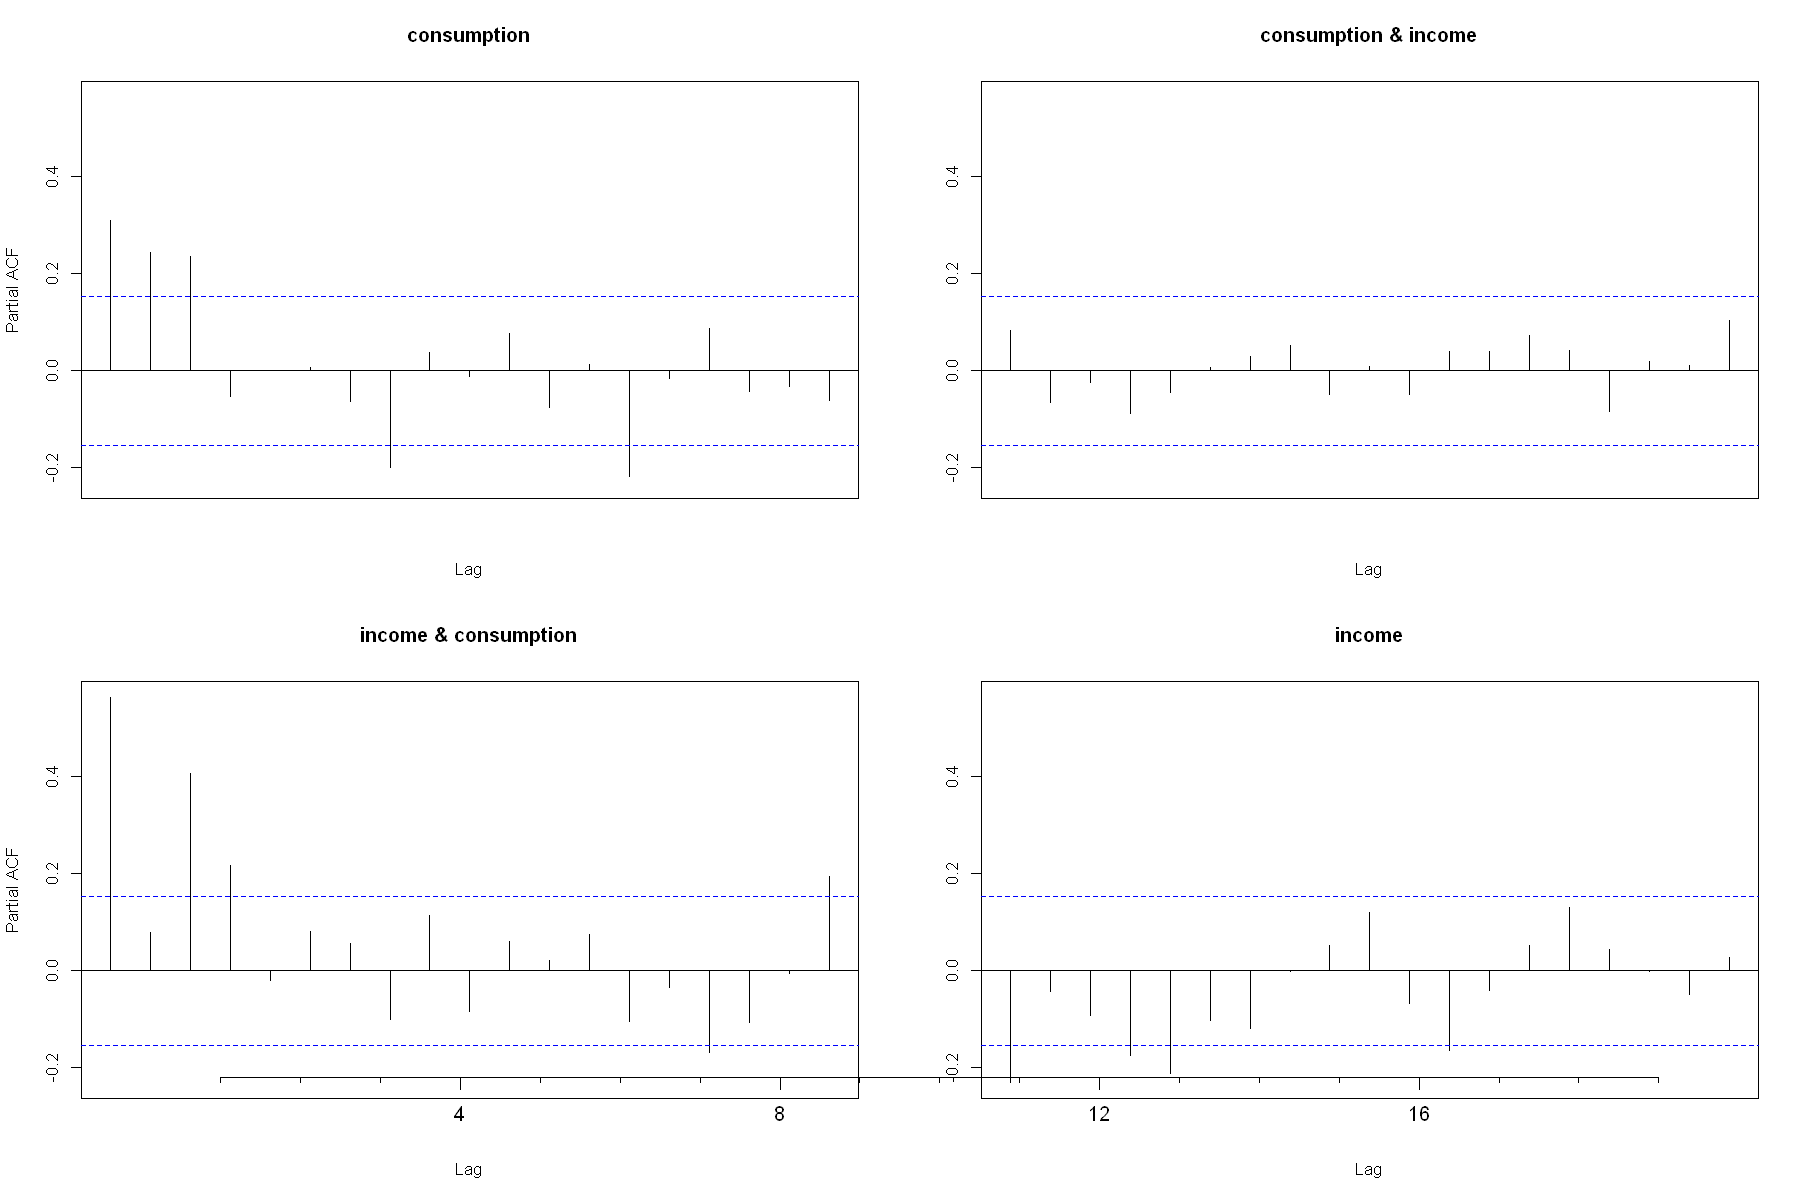

In [7]:
Pacf(usconsumption)

<hr><h1>Modeling</h1>

In [17]:
train = ts(usconsumption[1:156,],start=c(1970,1),end=c(2008,4),frequency = 4)
test = ts(usconsumption[157:164,],start=c(2009,1),end=c(2010,4),frequency = 4)

Running the automatic model selector to identify p.

In [21]:
VARselect(train, lag.max=8, type="const")

,1,2,3,4,5,6,7,8
AIC(n),-1.2314131,-1.217775,-1.2505936,-1.2505388,-1.2690326,-1.2244726,-1.1932426,-1.1788984
HQ(n),-1.1820445,-1.135494,-1.1354000,-1.1024328,-1.0880142,-1.0105417,-0.9463992,-0.8991427
SC(n),-1.1099045,-1.015261,-0.9670735,-0.8860130,-0.8235011,-0.6979353,-0.5856995,-0.4903497
FPE(n),0.2918831,0.295903,0.2863752,0.2864365,0.2812579,0.2941796,0.3036602,0.3082446


In [115]:
result <- data.frame(matrix(ncol = 3, nrow = 0))

### Model with p = 5

In [116]:
p_ = 5
VAR_P5 <- VAR(train, p=p_, type = "const")

#### Check residual

In [117]:
serial.test(VAR_P5, lags.pt=10, type="PT.asymptotic")


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR_P5
Chi-squared = 13.11, df = 20, p-value = 0.8726

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR_P5
Chi-squared = 13.11, df = 20, p-value = 0.8726



Test confirm the residual is white noise so that we can perform forecast.

In [118]:
fcst <- forecast(VAR_P5, h=8)
print(sqrt(mean(test[,1]-fcst$forecast$consumption$mean)^2))
print(sqrt(mean(test[,2]-fcst$forecast$income$mean)^2))
result = rbind(result, c(p_, sqrt(mean(test[,1]-fcst$forecast$consumption$mean)^2), sqrt(mean(test[,2]-fcst$forecast$income$mean)^2)))

[1] 0.03271834
[1] 0.2508865


Lets check if reducing the complexity we can still have good results.

### Model with  p = 4

In [119]:
p_ = 4
VAR_P4 <- VAR(train, p=p_,type = "const")

#### Check residual

In [120]:
serial.test(VAR_P4, lags.pt=10, type="PT.asymptotic")


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR_P4
Chi-squared = 20.3, df = 24, p-value = 0.6796

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR_P4
Chi-squared = 20.3, df = 24, p-value = 0.6796



Test confirm the residual is white noise so that we can perform forecast.

In [121]:
fcst <- forecast(VAR_P4, h=8)
print(sqrt(mean(test[,1]-fcst$forecast$consumption$mean)^2))
print(sqrt(mean(test[,2]-fcst$forecast$income$mean)^2))
result = rbind(result, c(p_, sqrt(mean(test[,1]-fcst$forecast$consumption$mean)^2), sqrt(mean(test[,2]-fcst$forecast$income$mean)^2)))

[1] 0.03074308
[1] 0.206937


Our result improved for p = 4, lets continue our search.

### Model with p = 3

In [122]:
p_ = 3
VAR_P3 <- VAR(train, p=p_,type = "const")

#### Check residual

In [123]:
serial.test(VAR_P3, lags.pt=10, type="PT.asymptotic")


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR_P3
Chi-squared = 29.246, df = 28, p-value = 0.4001

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR_P3
Chi-squared = 29.246, df = 28, p-value = 0.4001



Test confirm the residual is white noise so that we can perform forecast.

In [124]:
fcst <- forecast(VAR_P3, h=8)
print(sqrt(mean(test[,1]-fcst$forecast$consumption$mean)^2))
print(sqrt(mean(test[,2]-fcst$forecast$income$mean)^2))
result = rbind(result, c(p_, sqrt(mean(test[,1]-fcst$forecast$consumption$mean)^2), sqrt(mean(test[,2]-fcst$forecast$income$mean)^2)))

[1] 0.09533191
[1] 0.1878081


### Comparison of RSME

In [127]:
x <- c("p", "RSME Consumption", "RSME Income")
colnames(result) <- x
result

p,RSME Consumption,RSME Income
<dbl>,<dbl>,<dbl>
5,0.03271834,0.2508865
4,0.03074308,0.2069370
3,0.09533191,0.1878081


We are going to choose p = 4 that by reducing complexity I obtain decrease in RSME.

<h1>Forecasting</h1>

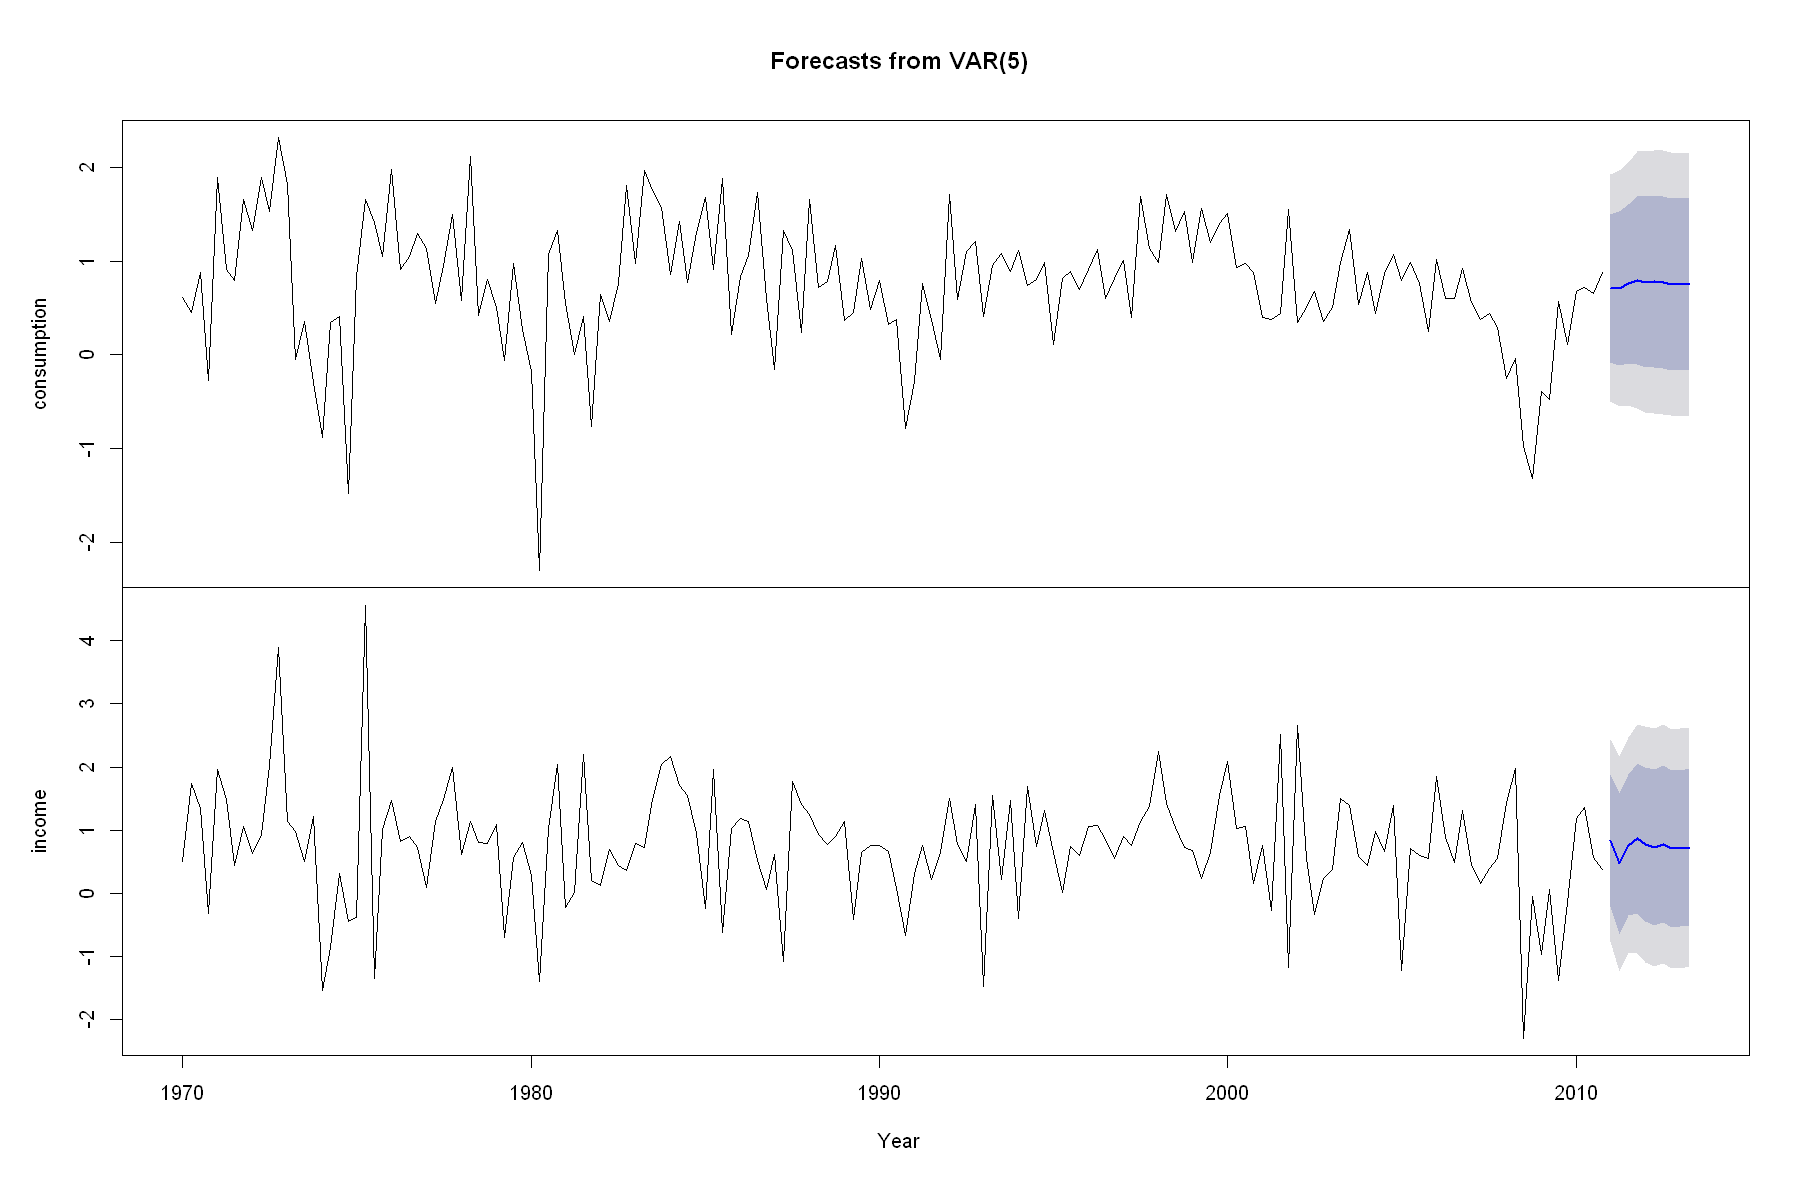

In [130]:
p_=5
FINAL_VAR_MODEL <- VAR(usconsumption, p=p_,type = "const")
fcst <- forecast(FINAL_VAR_MODEL, h=10)
plot(fcst, xlab="Year")